[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요.


### ydata Profiling(Pandas Profiling)
* Pandas Profiling 이 ydata Profiling 으로 변경되었습니다.
* [ydataai/ydata-profiling: 1 Line of code data quality profiling & exploratory data analysis for Pandas and Spark DataFrames.](https://github.com/ydataai/ydata-profiling)

* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge ydata-profiling`
* pip로 주피터를 설치했다면 : `pip install ydata-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt




## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

<Axes: title={'center': '한글폰트설정'}>

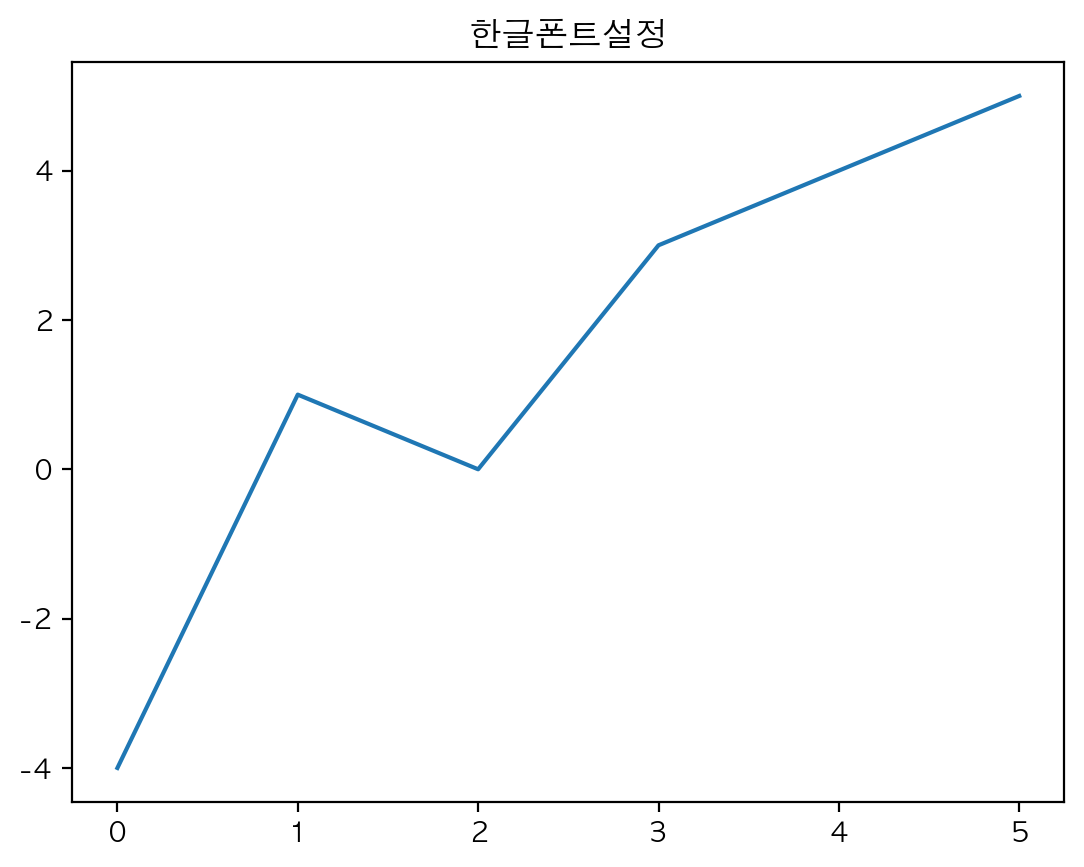

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"

# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트를 설정합니다.
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)

pd.Series([-4,1,0,3,4,5]).plot(title='한글폰트설정')

In [3]:
# 한글폰트 설정 확인을 합니다.




In [4]:
# 그래프가 선명하게 표시되도록 합니다.



## 데이터 로드

In [5]:
# 데이터를 로드해서 df 라는 변수에 담습니다.
df = pd.read_csv('data/전국도시공원정보표준데이터.csv',encoding='cp949')
df.shape

(17564, 19)

In [6]:
# 미리보기를 합니다.
df.head()


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,41830-00017,광탄2호 소공원,소공원,NaN,경기도 양평군 용문면 광탄리 711,37.509628,127.628406,856.0,NaN,NaN,NaN,NaN,NaN,1994-02-25,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군
1,41830-00031,광탄3호 소공원,소공원,NaN,경기도 양평군 용문면 광탄리 762,37.508443,127.627414,847.0,NaN,NaN,NaN,NaN,NaN,1994-02-25,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군
2,41830-00018,공흥 소공원,소공원,NaN,경기도 양평군 양평읍 공흥리 885-1,37.493844,127.509326,1276.0,NaN,NaN,NaN,NaN,NaN,2012-11-22,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군
3,41830-00019,한강아트로드 공원,소공원,NaN,경기도 양평군 강하면 운심리 43-25,37.496021,127.408216,3300.0,NaN,NaN,NaN,NaN,NaN,2012-08-30,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군
4,41830-00020,강하 소공원,소공원,경기도 양평군 강하면 운심길 58,경기도 양평군 강하면 운심리 28-1,37.496164,127.412326,394.0,농구장+축구장+테니스장,NaN,NaN,NaN,NaN,2012-08-30,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군


### ydata Profiling(Pandas Profiling)
* Pandas Profiling 이 ydata Profiling 으로 변경되었습니다.
* [ydataai/ydata-profiling: 1 Line of code data quality profiling & exploratory data analysis for Pandas and Spark DataFrames.](https://github.com/ydataai/ydata-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge ydata-profiling`
* pip로 주피터를 설치했다면 : `pip install ydata-profiling`

In [7]:
# 버전에 따라 기능의 차이가 있습니다.
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import ydata_profiling

ydata_profiling.__version__


'v4.9.0'

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

* <font color="red">한글 폰트 설정 문제 해결 영상 : </font> https://youtu.be/BhZvZpNF9jU
* ydata-profiling 에서는 해당 내용이 라이브러리 이슈로 등록되어 있어 소스코드를 수정하여 사용해야 합니다.

In [8]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.
from ydata_profiling import ProfileReport

# Win
# plt.rc("font", family="Malgun Gothic")
# Mac
plt.rc("font", family="AppleGothic")

# profile = ProfileReport(df,title='도시공원표준데이터')
# profile.to_file(output_file='05-park_pandas_profile.html')



## 기본 정보 보기

In [9]:
# info로 기본 정보를 봅니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          17564 non-null  object 
 1   공원명           17564 non-null  object 
 2   공원구분          17564 non-null  object 
 3   소재지도로명주소      3432 non-null   object 
 4   소재지지번주소       17337 non-null  object 
 5   위도            17564 non-null  float64
 6   경도            17564 non-null  float64
 7   공원면적          17564 non-null  float64
 8   공원보유시설(운동시설)  5154 non-null   object 
 9   공원보유시설(유희시설)  6412 non-null   object 
 10  공원보유시설(편익시설)  5053 non-null   object 
 11  공원보유시설(교양시설)  632 non-null    object 
 12  공원보유시설(기타시설)  2714 non-null   object 
 13  지정고시일         14392 non-null  object 
 14  관리기관명         16535 non-null  object 
 15  전화번호          16439 non-null  object 
 16  데이터기준일자       17564 non-null  object 
 17  제공기관코드        17564 non-null  object 
 18  제공기관명         17564 non-nu

In [10]:
# 결측치의 수를 구합니다.
df.isnull().sum()


관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        14132
소재지지번주소           227
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    12410
공원보유시설(유희시설)    11152
공원보유시설(편익시설)    12511
공원보유시설(교양시설)    16932
공원보유시설(기타시설)    14850
지정고시일            3172
관리기관명            1029
전화번호             1125
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

In [11]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.
round(df.isnull().mean()*100,2)


관리번호             0.00
공원명              0.00
공원구분             0.00
소재지도로명주소        80.46
소재지지번주소          1.29
위도               0.00
경도               0.00
공원면적             0.00
공원보유시설(운동시설)    70.66
공원보유시설(유희시설)    63.49
공원보유시설(편익시설)    71.23
공원보유시설(교양시설)    96.40
공원보유시설(기타시설)    84.55
지정고시일           18.06
관리기관명            5.86
전화번호             6.41
데이터기준일자          0.00
제공기관코드           0.00
제공기관명            0.00
dtype: float64

## 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

In [12]:
# 폰트 설정이 해제되었다면 다시 설정해 주세요.



<Axes: >

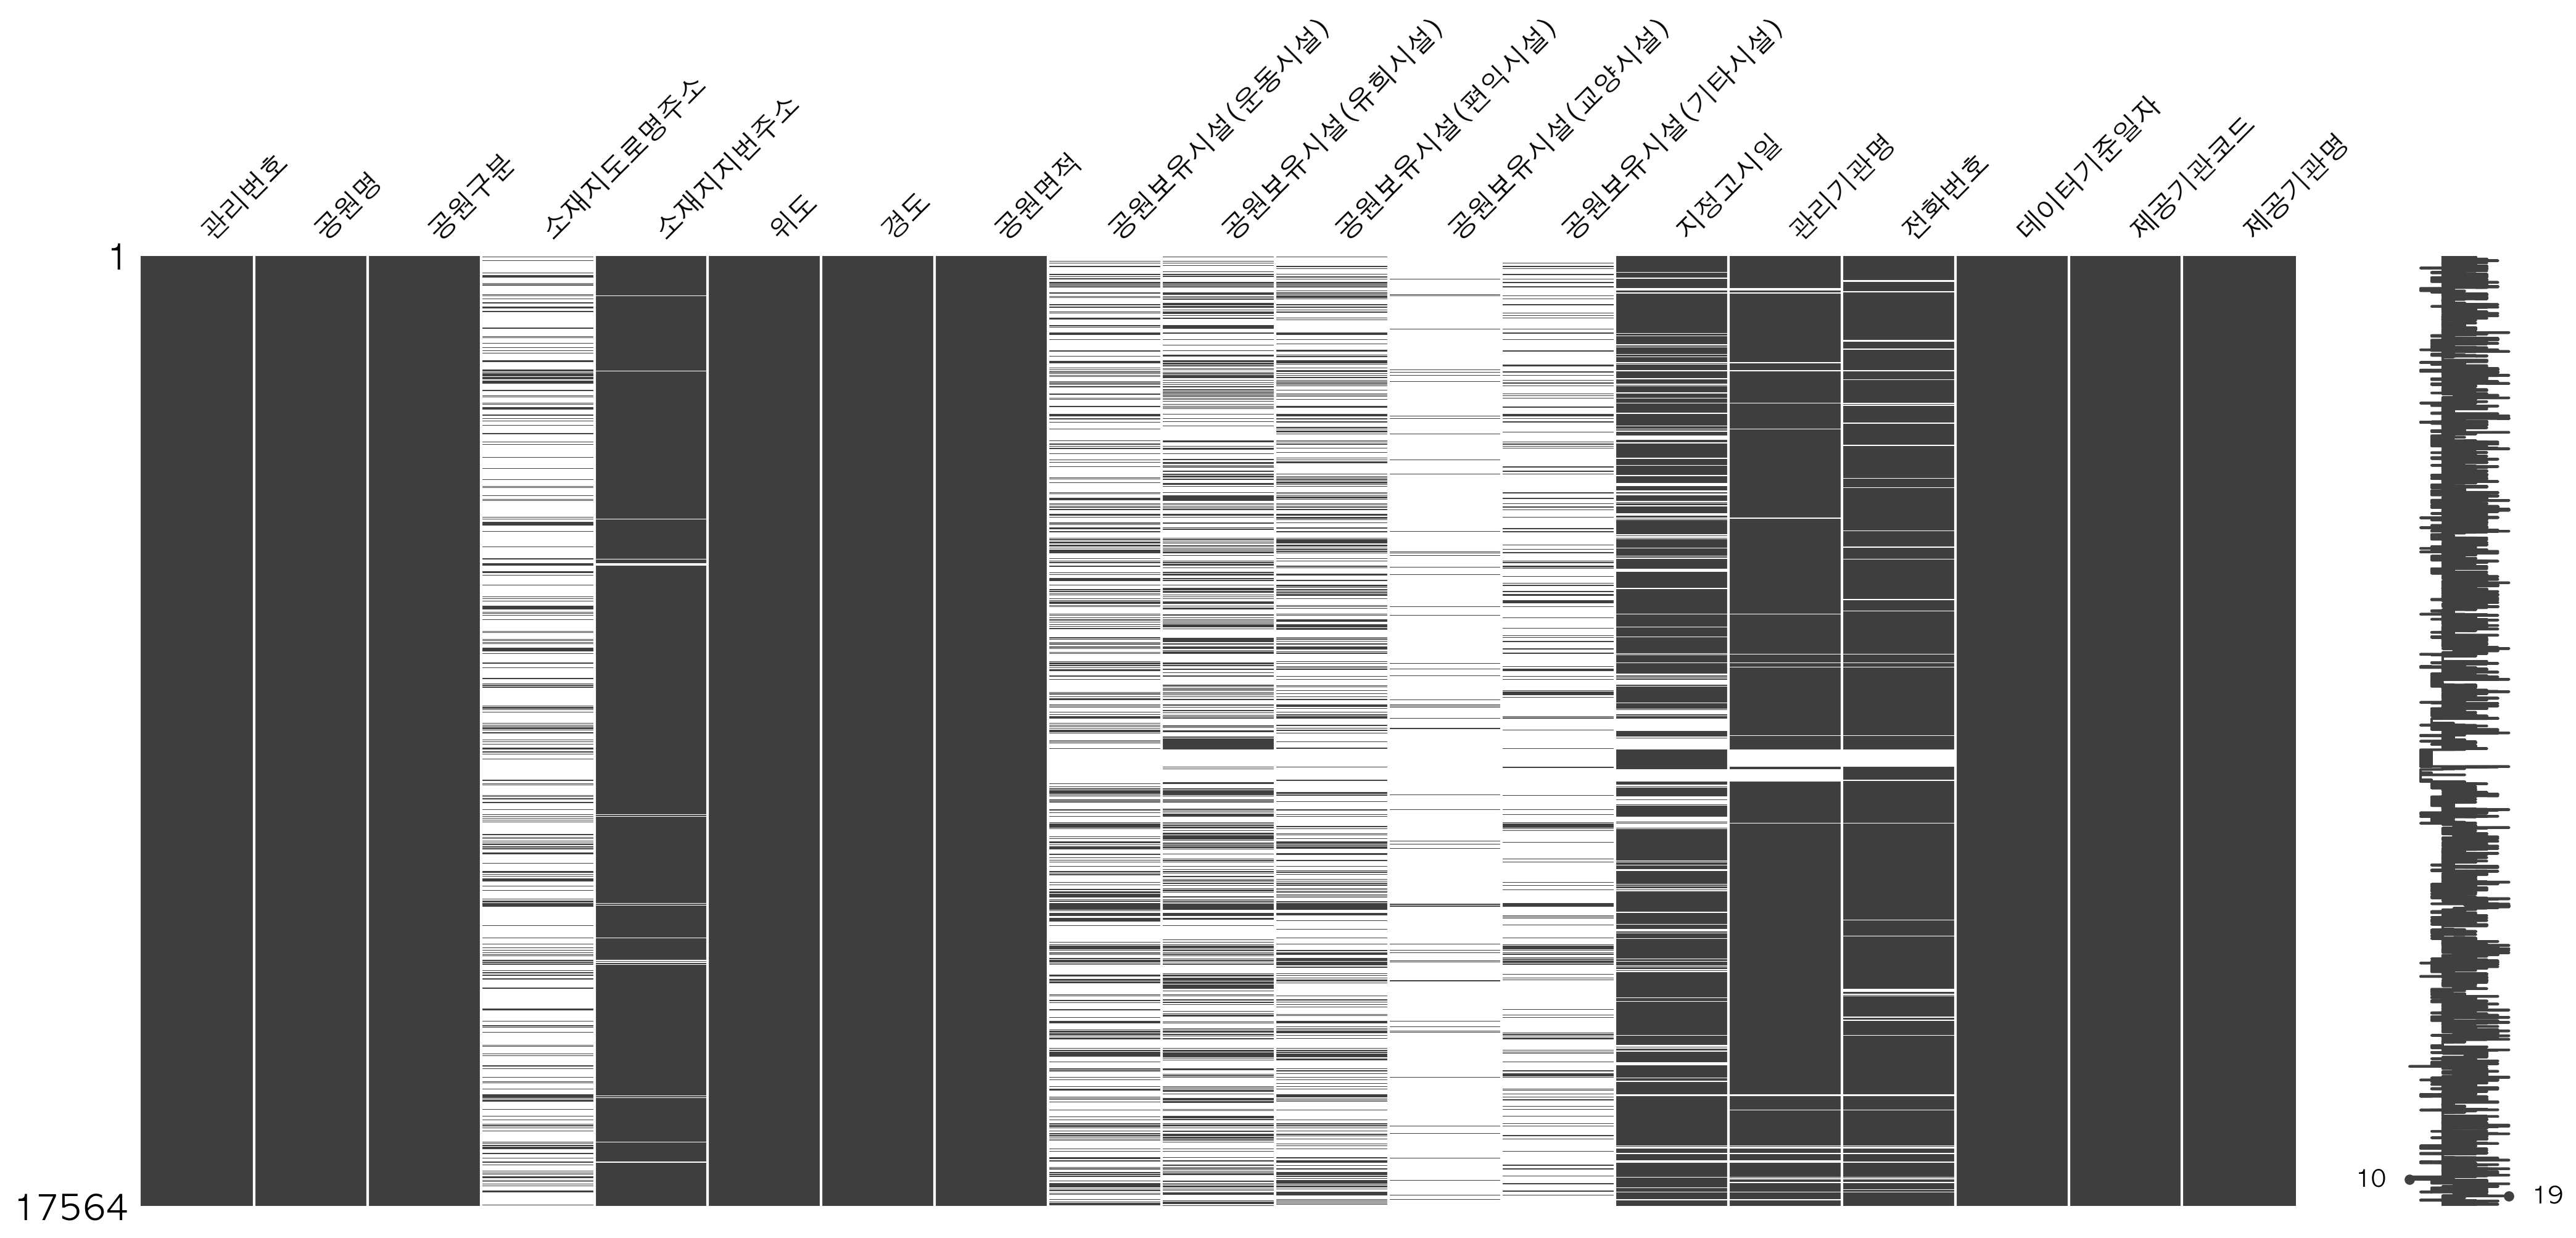

In [13]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다.
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.

import missingno

missingno.matrix(df)

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<Axes: >

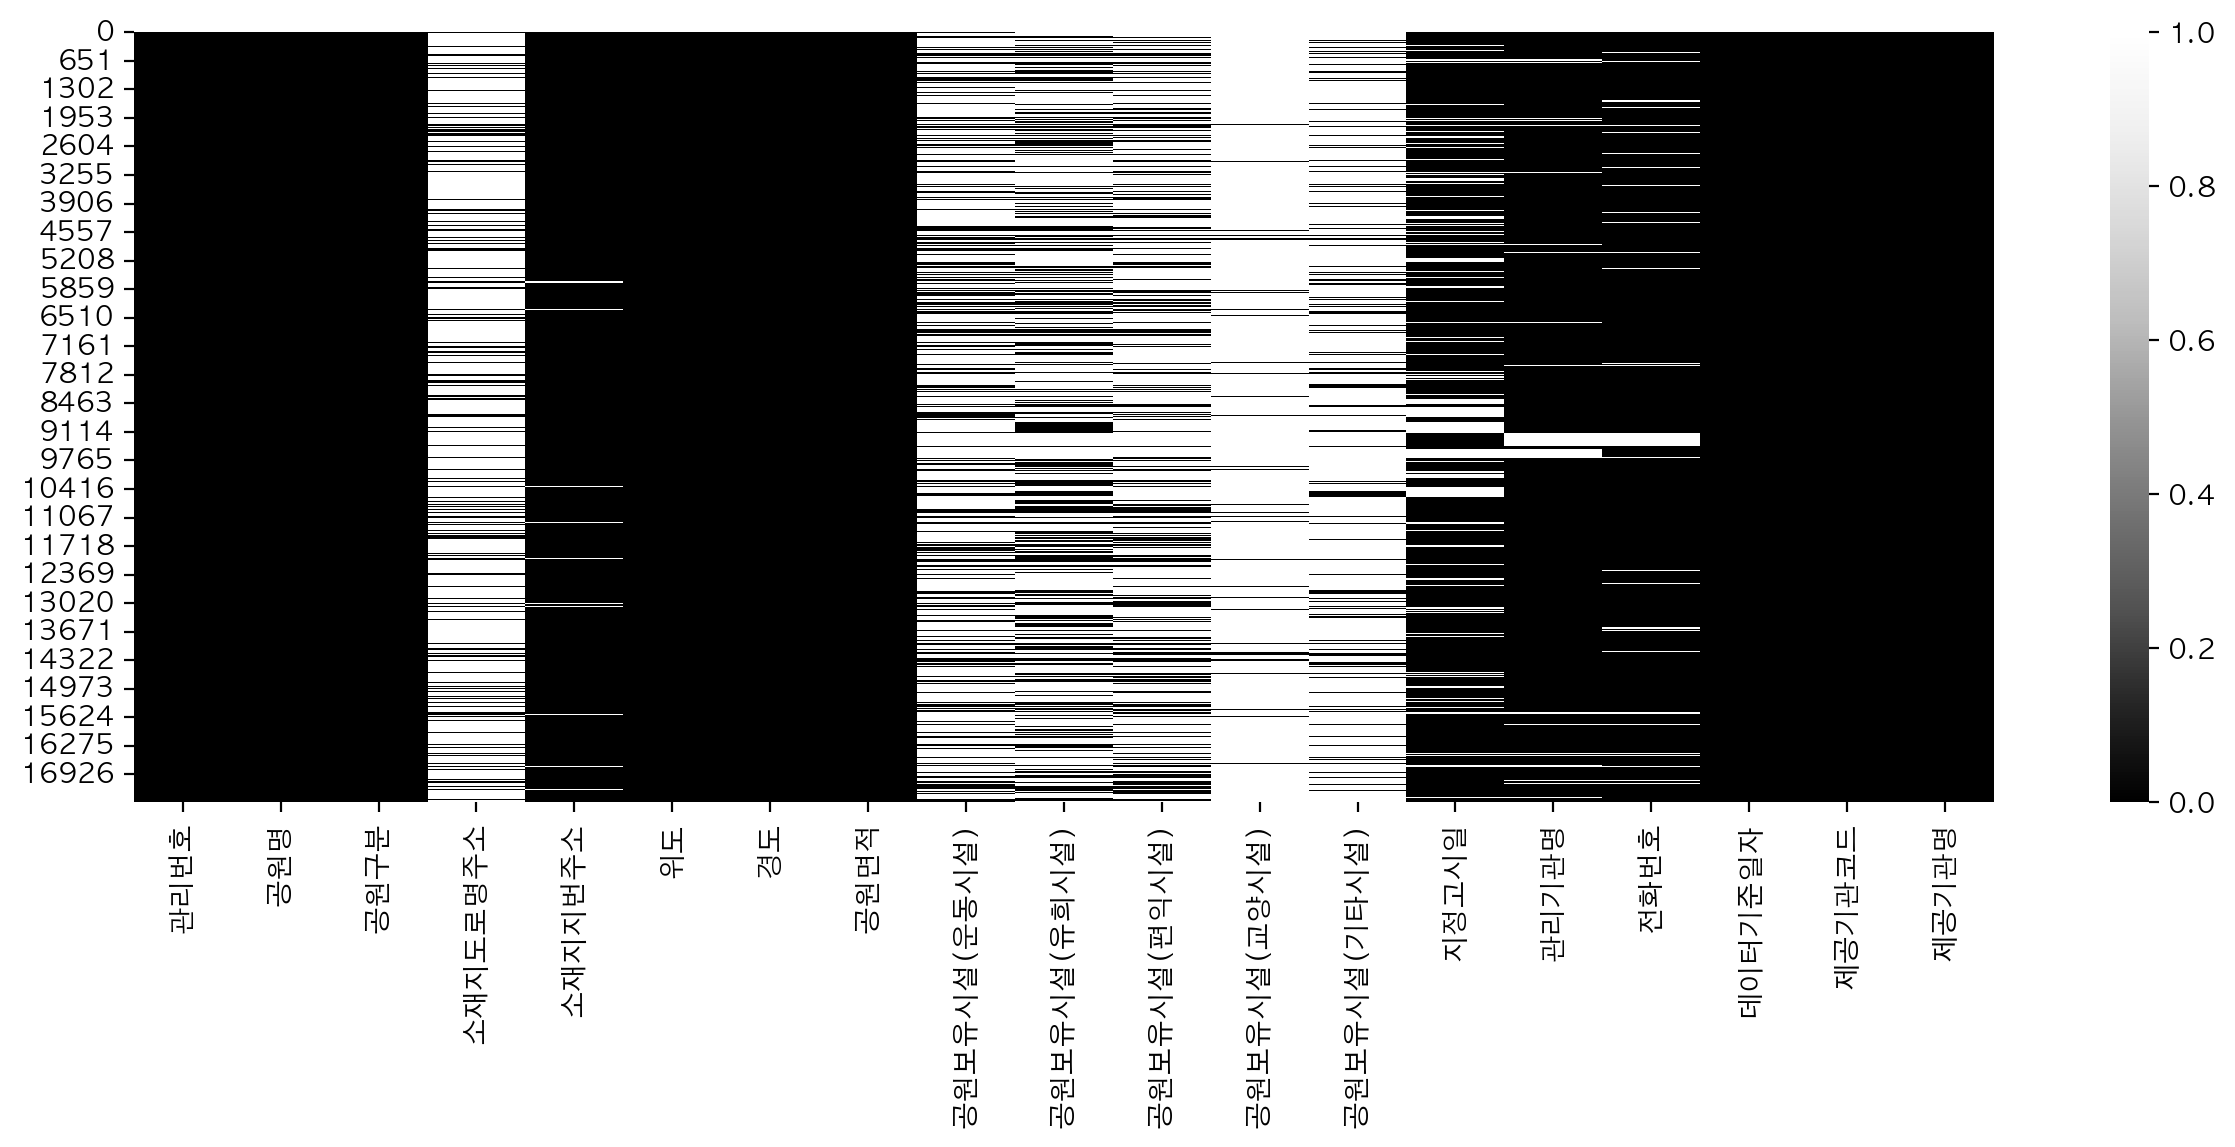

In [14]:
# seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.
null = df.isnull()

plt.figure(figsize=(15,5))
sns.heatmap(null,cmap='Greys_r')

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [15]:
# 전체 컬럼명을 출력해 봅니다.
df.columns


Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [16]:
# drop 으로 'Unnamed: 19' 를 제거하기


## 결측치 대체
### 도로명 주소와 지번 주소
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [17]:
# 도로명 주소의 널값 수

df['소재지도로명주소'].isnull().sum()

14132

In [18]:
# 지번 주소의 널값 수
df['소재지지번주소'].isnull().sum()


227

In [19]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
4,41830-00020,강하 소공원,소공원,경기도 양평군 강하면 운심길 58,경기도 양평군 강하면 운심리 28-1,37.496164,127.412326,394.0,농구장+축구장+테니스장,NaN,NaN,NaN,NaN,2012-08-30,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군
7,41830-00023,오빈14호 소공원,소공원,경기도 양평군 양평읍 오빈1리길12번길 4,경기도 양평군 양평읍 오빈리 88-46,37.507148,127.479103,404.0,NaN,NaN,NaN,NaN,NaN,2013-10-15,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군
8,41830-00024,오빈15호 소공원,소공원,경기도 양평군 양평읍 오빈1리길 9,경기도 양평군 양평읍 오빈리 81-32,37.506986,127.479677,293.0,NaN,NaN,NaN,NaN,NaN,2013-10-15,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군
17,27290-00127,송일어린이공원,어린이공원,대구광역시 달서구 학산로2길 38,대구광역시 달서구 월성동 500-1,35.824133,128.532821,1786.0,NaN,조합놀이대,화장실,NaN,NaN,1989-04-15,대구광역시 달서구청,053-667-3636,2023-10-13,3470000,대구광역시 달서구
18,27290-00128,송지공원,어린이공원,대구광역시 달서구 앞산순환로 255,대구광역시 달서구 송현동 1977,35.826169,128.555896,1649.4,NaN,"그네, 조합놀이대",NaN,NaN,NaN,1978-12-09,대구광역시 달서구청,053-667-3636,2023-10-13,3470000,대구광역시 달서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,52130-00152,미장동공원,소공원,전북특별자치도 군산시 미장안8길 15,전북특별자치도 군산시 미장동 517,35.965602,126.731714,3255.0,NaN,NaN,NaN,NaN,의자 등,2011-10-28,전북특별자치도 군산시청,063-454-2987,2024-06-13,4671000,전북특별자치도 군산시
17546,52130-00145,금광동공원,소공원,전북특별자치도 군산시 금광길 25-5,전북특별자치도 군산시 금광동 156-57,35.982219,126.708927,765.0,하늘걷기+허리돌리기 등,NaN,NaN,NaN,NaN,2012-02-17,전북특별자치도 군산시청,063-454-2987,2024-06-13,4671000,전북특별자치도 군산시
17554,27260-00018,희망공원,어린이공원,대구광역시 수성구 들안로 13길 118,대구광역시 수성구 상동 17,35.839283,128.615149,2655.0,NaN,조합놀이대,NaN,NaN,NaN,1976-07-30,대구광역시 수성구청,053-666-2862,2024-07-11,3460000,대구광역시 수성구
17555,27260-00019,청소년공원,어린이공원,대구광역시 수성구 수성로 32길 99,대구광역시 수성구 상동 54,35.836736,128.613459,2648.0,배드민턴장,NaN,NaN,NaN,NaN,2009-03-30,대구광역시 수성구청,053-666-2862,2024-07-11,3460000,대구광역시 수성구


In [20]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])


In [21]:
# "소재지도로명주소"의 결측치수를 세어봅니다.

df['소재지도로명주소'].isnull().sum()

0

In [22]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명


## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [23]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기d
df['시도'] = df['소재지도로명주소'].str.split(expand=True)[0]
df[['소재지도로명주소','시도']]

,소재지도로명주소,시도
0,경기도 양평군 용문면 광탄리 711,경기도
1,경기도 양평군 용문면 광탄리 762,경기도
2,경기도 양평군 양평읍 공흥리 885-1,경기도
3,경기도 양평군 강하면 운심리 43-25,경기도
4,경기도 양평군 강하면 운심길 58,경기도
...,...,...
17559,대구광역시 수성구 들안로 8길 68-5,대구광역시
17560,대구광역시 수성구 두산동 155,대구광역시
17561,대구광역시 수성구 지산동 1013,대구광역시
17562,대구광역시 수성구 지산동 1184-5,대구광역시


In [24]:
# 구군 가져오기
df['구군'] = df['소재지도로명주소'].str.split(expand=True)[1]
df[['소재지도로명주소','시도','구군']].sample(3)


,소재지도로명주소,시도,구군
138,경기도 평택시 군문동 201-1,경기도,평택시
13680,경상남도 거제시 상동동 369,경상남도,거제시
8344,부산광역시 사상구 양지로 18,부산광역시,사상구


In [25]:
# 시도 데이터의 빈도수 세어보기
df['시도'].value_counts()


시도
경기도           4518
서울특별시         1951
충청남도          1726
경상남도          1242
전라남도          1040
경상북도           940
충청북도           789
인천광역시          752
부산광역시          711
대구광역시          656
전북특별자치도        643
광주광역시          530
울산광역시          468
대전광역시          455
강원특별자치도        435
제주특별자치도        266
강원도            188
세종특별자치시        165
-               40
영덕군             26
전라북도            15
강원특별자치도양구군       6
인천광역시연수구         1
수원시              1
Name: count, dtype: int64

In [26]:
# 강원특별자치도양구군, 영덕군, 인천광역시연수구 변경
df['시도'] = df['시도'].replace('강원특별자치도양구군','강원특별자치도')
df['시도'] = df['시도'].replace('인천광역시연수구','인천광역시')
df['시도'] = df['시도'].replace('영덕군','경상북도')
df = df[df['시도'] != '-']
df['시도'].value_counts()


시도
경기도        4518
서울특별시      1951
충청남도       1726
경상남도       1242
전라남도       1040
경상북도        966
충청북도        789
인천광역시       753
부산광역시       711
대구광역시       656
전북특별자치도     643
광주광역시       530
울산광역시       468
대전광역시       455
강원특별자치도     441
제주특별자치도     266
강원도         188
세종특별자치시     165
전라북도         15
수원시           1
Name: count, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

<Axes: xlabel='경도', ylabel='위도'>

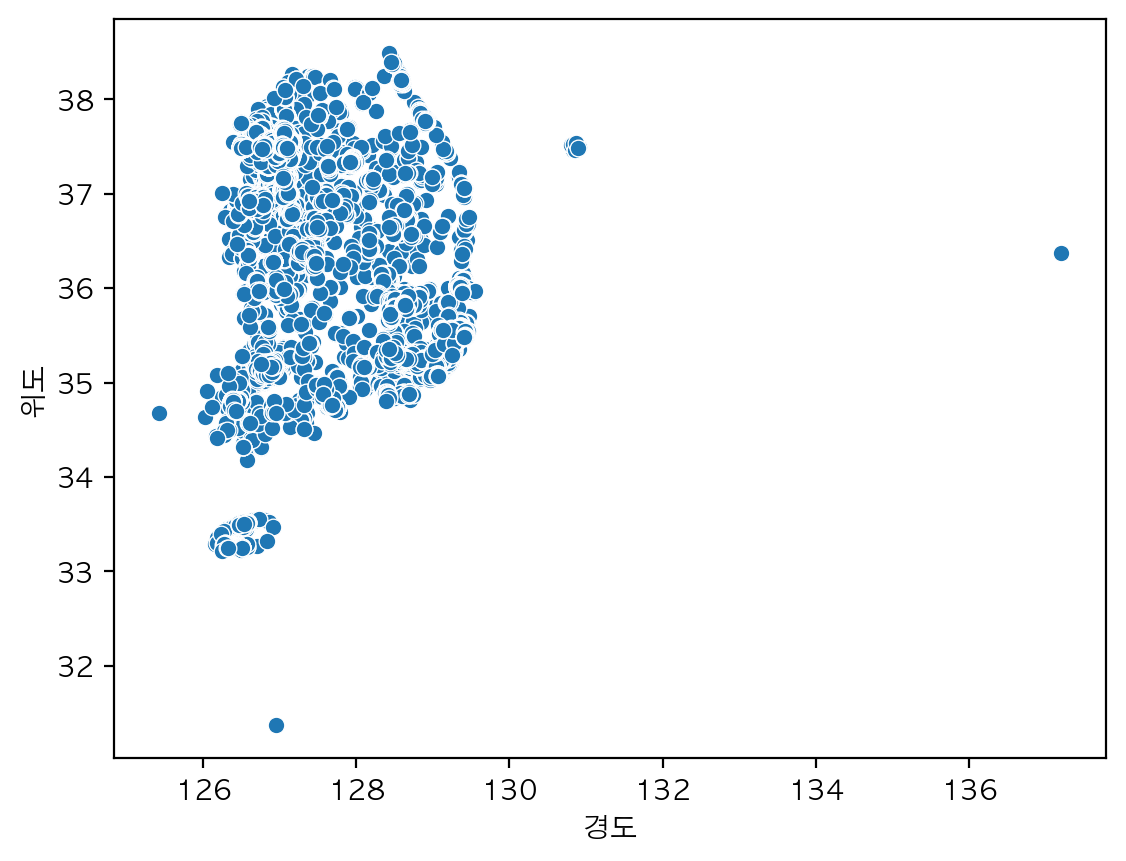

In [27]:
# 위경도 시각화
sns.scatterplot(data=df,x='경도',y='위도')

In [28]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다.
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.
df_park = df[(df['경도']<132) & (df['위도'] >32)].copy()

<Axes: xlabel='경도', ylabel='위도'>

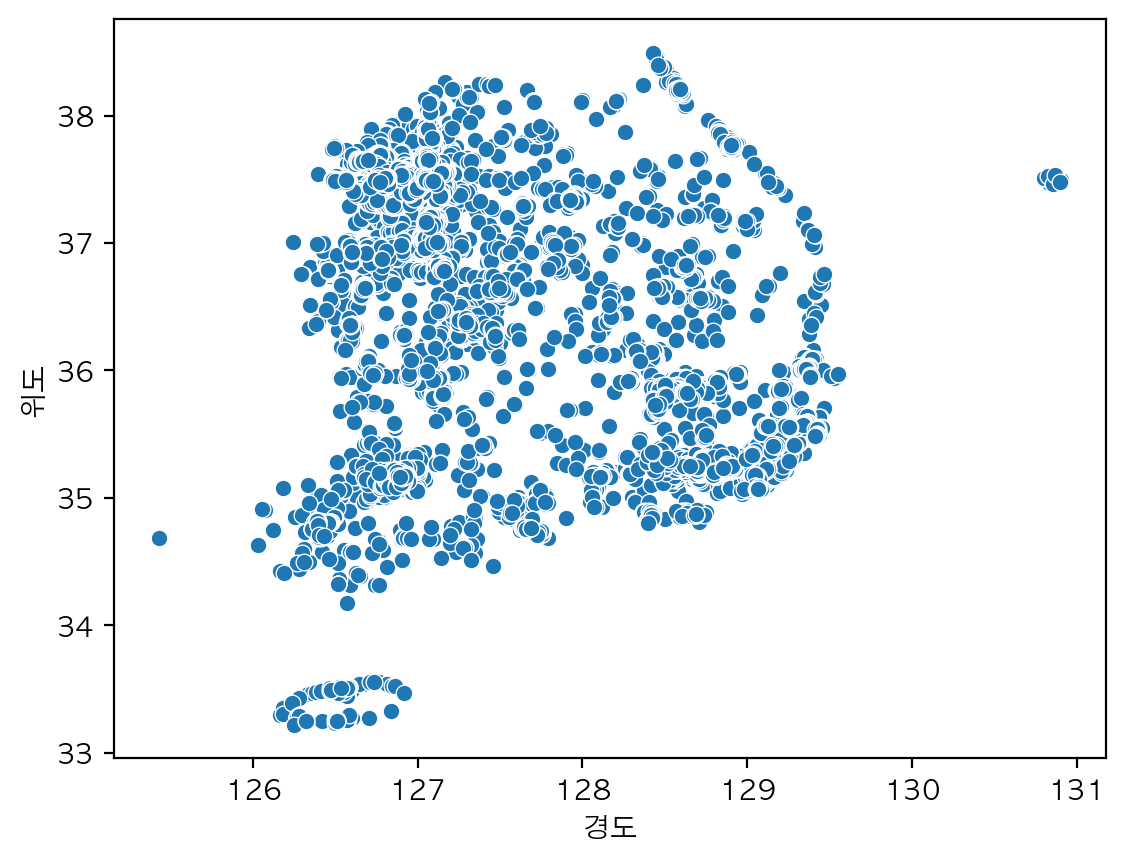

In [29]:
# 위도 경도의 아웃라이어 데이터가 제거되었는지 확인함
sns.scatterplot(
    data=df_park,
    x='경도',
    y='위도'
)


In [30]:
# 위도와 경도의 요약값을 describe 로 봅니다.
df_park[['위도','경도']].describe()


,위도,경도
count,17522.000000,17522.000000
mean,36.538731,127.464528
std,1.025744,0.841257
min,33.218571,125.433012
25%,35.754058,126.871748
50%,36.813411,127.102606
75%,37.455662,128.051273
max,38.493170,130.905954


In [31]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다.
df_park[(df_park['경도']>132) | (df_park['위도']<32)]


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군


## 날짜 데이터 다루기

In [32]:
# 지정고시일의 데이터 타입을 봅니다.
df['지정고시일'].head()


0    1994-02-25
1    1994-02-25
2    2012-11-22
3    2012-08-30
4    2012-08-30
Name: 지정고시일, dtype: object

In [33]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경합니다.
df['지정고시일'] = pd.to_datetime(df['지정고시일'])
df['지정고시일'].head(1)


0   1994-02-25
Name: 지정고시일, dtype: datetime64[ns]

In [34]:
# 고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.
df['고시연도'] = df['지정고시일'].dt.year
df['고시월'] = df['지정고시일'].dt.month

df[['지정고시일','고시연도','고시월']]

,지정고시일,고시연도,고시월
0,1994-02-25,1994.0,2.0
1,1994-02-25,1994.0,2.0
2,2012-11-22,2012.0,11.0
3,2012-08-30,2012.0,8.0
4,2012-08-30,2012.0,8.0
...,...,...,...
17559,1976-07-30,1976.0,7.0
17560,1976-07-30,1976.0,7.0
17561,1976-07-30,1976.0,7.0
17562,2003-08-13,2003.0,8.0


In [35]:
# 화랑공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.
df.loc[df['공원명'].str.contains('화랑'),['공원명','고시연도']]


,공원명,고시연도
745,화랑,2004.0
2736,화랑공원,1999.0
7555,화랑공원,2010.0
13353,화랑,1991.0
14148,판교제8호(화랑)공원,2004.0
14836,화랑공원,1972.0
17185,화랑공원,1980.0


<Axes: xlabel='고시연도', ylabel='Count'>

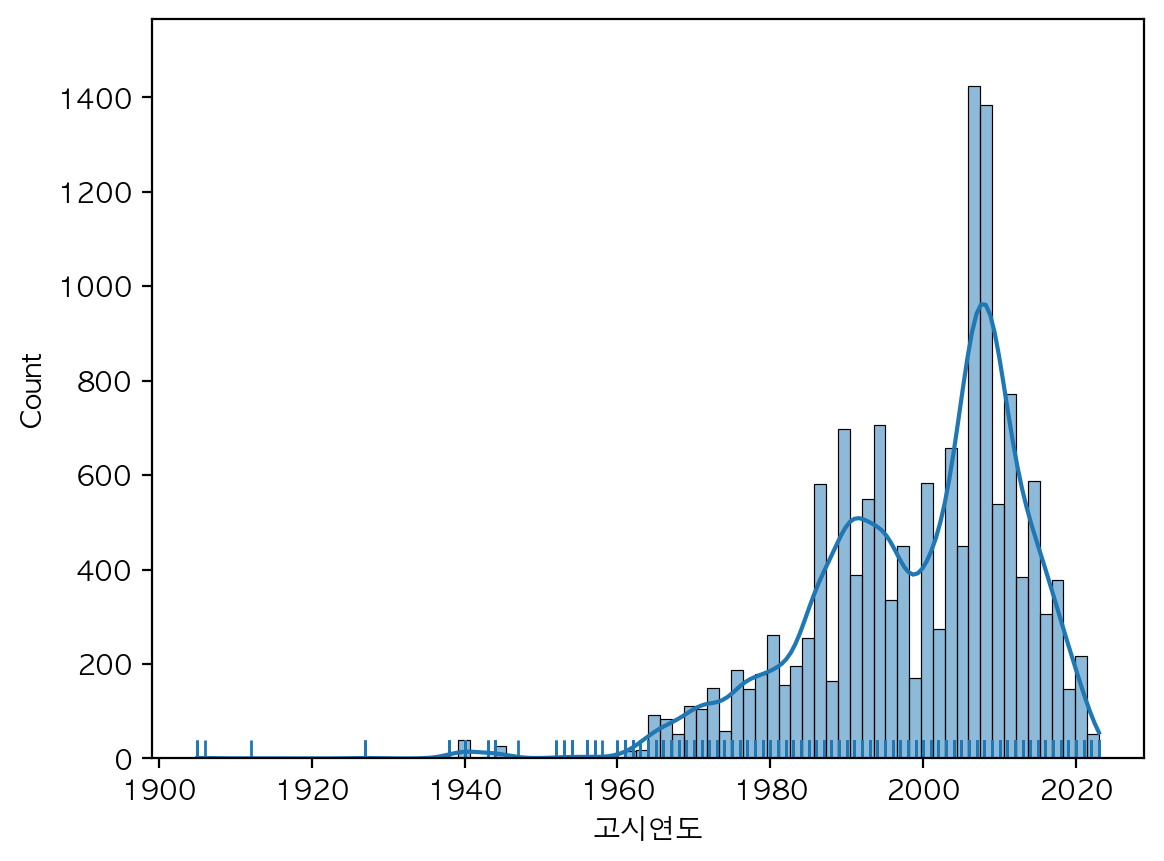

In [36]:
# 고시연도의 분포를 distplot 으로 그립니다.
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그립니다.
sns.histplot(
    df.loc[df['고시연도'].notnull(),'고시연도'],
    kde=True,
)
sns.rugplot(df.loc[df['고시연도'].notnull(),'고시연도'],)


* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [37]:
# 연도와 월별 고시 현황을 pivot_table로 그려봅니다.
# year_month 라는 변수에 담아 재사용 합니다.
# 데이터가 많기 때문에 2000년보다 크고 2019년보다 작은 연도의 데이터만 봅니다.
year_month = pd.pivot_table(
    data=df,
    index='고시연도',
    columns='고시월',
    values='공원명',
    aggfunc="count"
)

year_month = year_month[(year_month.index > 2000) & (year_month.index < 2020)]
# year_month = year_month.astype(int)

year_month.round(0).astype(int).style.background_gradient()


고시월,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
고시연도,,,,,,,,,,,,
2001.000000,47,34,7,49,5,14,7,21,26,38,27,38
2002.000000,29,19,18,12,33,21,27,13,5,40,32,25
2003.000000,36,9,9,19,16,35,24,11,5,20,49,48
2004.000000,68,17,13,12,7,19,6,51,9,18,40,117
2005.000000,79,24,12,24,45,25,11,39,13,35,60,83
2006.000000,54,26,75,25,42,44,28,40,22,61,94,114
2007.000000,55,18,18,36,10,62,63,65,65,142,160,104
2008.000000,57,39,51,44,30,73,17,52,36,31,20,128
2009.000000,73,29,137,58,69,56,26,46,97,25,66,124


## 텍스트 데이터 다루기
### 정규표현식

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 :
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [38]:
# 정규표현식 라이브러리를 로드합니다.
# 설치가 필요 없이 파이썬에 내장되어 있는 라이브러리 입니다.
# 파이썬에 배터리 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있습니다.
import re


### 공원 보유시설

In [39]:
# 컬럼이 너무 많으면 끝까지 보이지 않습니다.
# options.display 를 사용해 max_columns 값을 채워줍니다.

pd.options.display.max_columns = 100

In [40]:
# 데이터를 미리보기 합니다.

df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,41830-00017,광탄2호 소공원,소공원,경기도 양평군 용문면 광탄리 711,경기도 양평군 용문면 광탄리 711,37.509628,127.628406,856.0,NaN,NaN,NaN,NaN,NaN,1994-02-25,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군,경기도,양평군,1994.0,2.0
1,41830-00031,광탄3호 소공원,소공원,경기도 양평군 용문면 광탄리 762,경기도 양평군 용문면 광탄리 762,37.508443,127.627414,847.0,NaN,NaN,NaN,NaN,NaN,1994-02-25,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군,경기도,양평군,1994.0,2.0
2,41830-00018,공흥 소공원,소공원,경기도 양평군 양평읍 공흥리 885-1,경기도 양평군 양평읍 공흥리 885-1,37.493844,127.509326,1276.0,NaN,NaN,NaN,NaN,NaN,2012-11-22,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군,경기도,양평군,2012.0,11.0
3,41830-00019,한강아트로드 공원,소공원,경기도 양평군 강하면 운심리 43-25,경기도 양평군 강하면 운심리 43-25,37.496021,127.408216,3300.0,NaN,NaN,NaN,NaN,NaN,2012-08-30,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군,경기도,양평군,2012.0,8.0
4,41830-00020,강하 소공원,소공원,경기도 양평군 강하면 운심길 58,경기도 양평군 강하면 운심리 28-1,37.496164,127.412326,394.0,농구장+축구장+테니스장,NaN,NaN,NaN,NaN,2012-08-30,경기도 양평군청,031-770-2358,2023-05-26,4170000,경기도 양평군,경기도,양평군,2012.0,8.0


### 운동시설
* 텍스트 데이터의 빈도수를 구합니다.
* 한 컬럼에 여러 텍스트가 , 혹은 - 등의 특수문자로 구분되어 있습니다.
* 데이터 전처리를 통해 텍스트의 빈도수를 구합니다.

In [41]:
# "공원보유시설(운동시설)" 의 빈도수를 세어 아래에서 5개만 봅니다.
df['공원보유시설(운동시설)'].tail()

17559    NaN
17560    NaN
17561    NaN
17562    NaN
17563    NaN
Name: 공원보유시설(운동시설), dtype: object

In [42]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담습니다.

gym = df['공원보유시설(운동시설)'].unique().tolist()
df['공원보유시설(운동시설)'].value_counts(sort=False)
gym = str(gym)

In [43]:
# 특수문자로 구분된 값을 , 로 구분되게 변경합니다.
# replace 기능을 사용해서 ,를 빈문자로 공백을 , 로 +를 ,로 변경합니다.
gym = gym.replace("+",",").replace("'",",").replace(' ',',').replace('/',",")
gym[:1000]

'[nan,,,농구장,축구장,테니스장,,,,마라톤운동기,윗몸일으키기,,,,운동기구,4종,,,,운동기구,3종,,,,체육시설,,,,야구장,운동장,족구장,,,,체육시설물,,,,체육시설,축구장,,,,체육시설,농구장,,,,테니스장,배드민턴장,체육시설,,,,체육시설물,농구대,,,,체율시설물,,,,족구장,농구대,체육시설물,,,,농구장,풋살경기장,체육시설,인라인트랙,,,,축구장,테니스장,체육시설,,,,온몸역기올리기,온몸허리돌리기,하늘걷기,,,,다리뻗치기,온몸근육풀기,온몸역기내리기,윗몸일으키기,,,,옆파도타기,온몸역기올리기,하늘걷기,,,,다리뻗치기,등허리지압기,스텝싸이클,옆파도타기,온몸허리돌리기,윗몸일으키기,하늘걷기,,,,다리뻗치기,등허리지압기,옆파도타기,온몸역기올리기,윗몸일으키기,하늘걷기,,,,레그프레스,크로스컨트리,트윈트위스트,,,,레그프레스,트윈트위스트,,,,옆파도타기,온몸근육풀기,온몸역기올리기,온몸허리돌리기,하늘걷기,,,,마라톤운동기,옆파도타기,온몸근육풀기,온몸허리돌리기,하늘걷기,,,,다리뻗치기,온몸노젓기,온몸허리돌리기,윗몸일으키기,,,,옆파도운동,오금펴기운동,온몸근육운동,하늘걷기운동,,,,체어웨이트,크로스컨트리,트윈트위스트,,,,게이트볼장,,,,배드민턴장,,,,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,,,,역기내리기운동,역기올리기운동,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,달리기,아래로당기기,앞으로밀기,체어풀,허리돌리기,공중걷기,윗몽일으키기,등허리지압기,하체흔들기온몸근육풀기,,,,등허리지압기,온몸근육풀기,,,,마라톤운동,양다리운동,등허리근육풀기운동,옆파도타기운동,,,,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,역기내리운동,역기올리기운동,양다리운동,옆파도타기운동,,,,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,크로스컨트리2,체어웨이트1,체어풀1,트윈바디싣업1,풀웨이트2,,,,,배드민턴네트및포스트1,스트레칭로라1,크로스컨

In [44]:
# 제거할 특수문자를 빈문자로 대체합니다.
# re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
# 정규표현식에서 +, *, . 등은 특별한 의미를 갖습니다.
# 이런 문자를 제거할 때는 \를 통해 예외처리를 합니다.
# 예를들어 .이라면 \. 으로 사용합니다.
# 여기에서는 숫자와 .을 제거하도록 합니다.
gym = re.sub("[\[\d\-nan\.()\]]","",gym)
gym = re.sub(",{2,}",",",gym)
gym[:1000]

<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\['
/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_54616/2358010344.py:7: SyntaxWarning: invalid escape sequence '\['
  gym = re.sub("[\[\d\-nan\.()\]]","",gym)


',농구장,축구장,테니스장,마라톤운동기,윗몸일으키기,운동기구,종,운동기구,종,체육시설,야구장,운동장,족구장,체육시설물,체육시설,축구장,체육시설,농구장,테니스장,배드민턴장,체육시설,체육시설물,농구대,체율시설물,족구장,농구대,체육시설물,농구장,풋살경기장,체육시설,인라인트랙,축구장,테니스장,체육시설,온몸역기올리기,온몸허리돌리기,하늘걷기,다리뻗치기,온몸근육풀기,온몸역기내리기,윗몸일으키기,옆파도타기,온몸역기올리기,하늘걷기,다리뻗치기,등허리지압기,스텝싸이클,옆파도타기,온몸허리돌리기,윗몸일으키기,하늘걷기,다리뻗치기,등허리지압기,옆파도타기,온몸역기올리기,윗몸일으키기,하늘걷기,레그프레스,크로스컨트리,트윈트위스트,레그프레스,트윈트위스트,옆파도타기,온몸근육풀기,온몸역기올리기,온몸허리돌리기,하늘걷기,마라톤운동기,옆파도타기,온몸근육풀기,온몸허리돌리기,하늘걷기,다리뻗치기,온몸노젓기,온몸허리돌리기,윗몸일으키기,옆파도운동,오금펴기운동,온몸근육운동,하늘걷기운동,체어웨이트,크로스컨트리,트윈트위스트,게이트볼장,배드민턴장,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,역기내리기운동,역기올리기운동,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,달리기,아래로당기기,앞으로밀기,체어풀,허리돌리기,공중걷기,윗몽일으키기,등허리지압기,하체흔들기온몸근육풀기,등허리지압기,온몸근육풀기,마라톤운동,양다리운동,등허리근육풀기운동,옆파도타기운동,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,역기내리운동,역기올리기운동,양다리운동,옆파도타기운동,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,크로스컨트리,체어웨이트,체어풀,트윈바디싣업,풀웨이트,배드민턴네트및포스트,스트레칭로라,크로스컨트리,체어웨이트,스텝싸이클,체어풀,워밍암,트윈바디싣업,풀웨이트,크로스컨트리,체어풀,워밍암,게이트볼장,농구장,등,운동기구,체력단련시설,허리돌리기,공중걷기,싸이클링,외,종,야외체육시설물,야외체육시설,야외체육시설,체력단련시설,싸이클링,외종,싸아

In [45]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.

gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장      287
농구장        281
하늘걷기       244
허리돌리기      226
온몸허리돌리기    219
Name: count, dtype: int64

<Axes: >

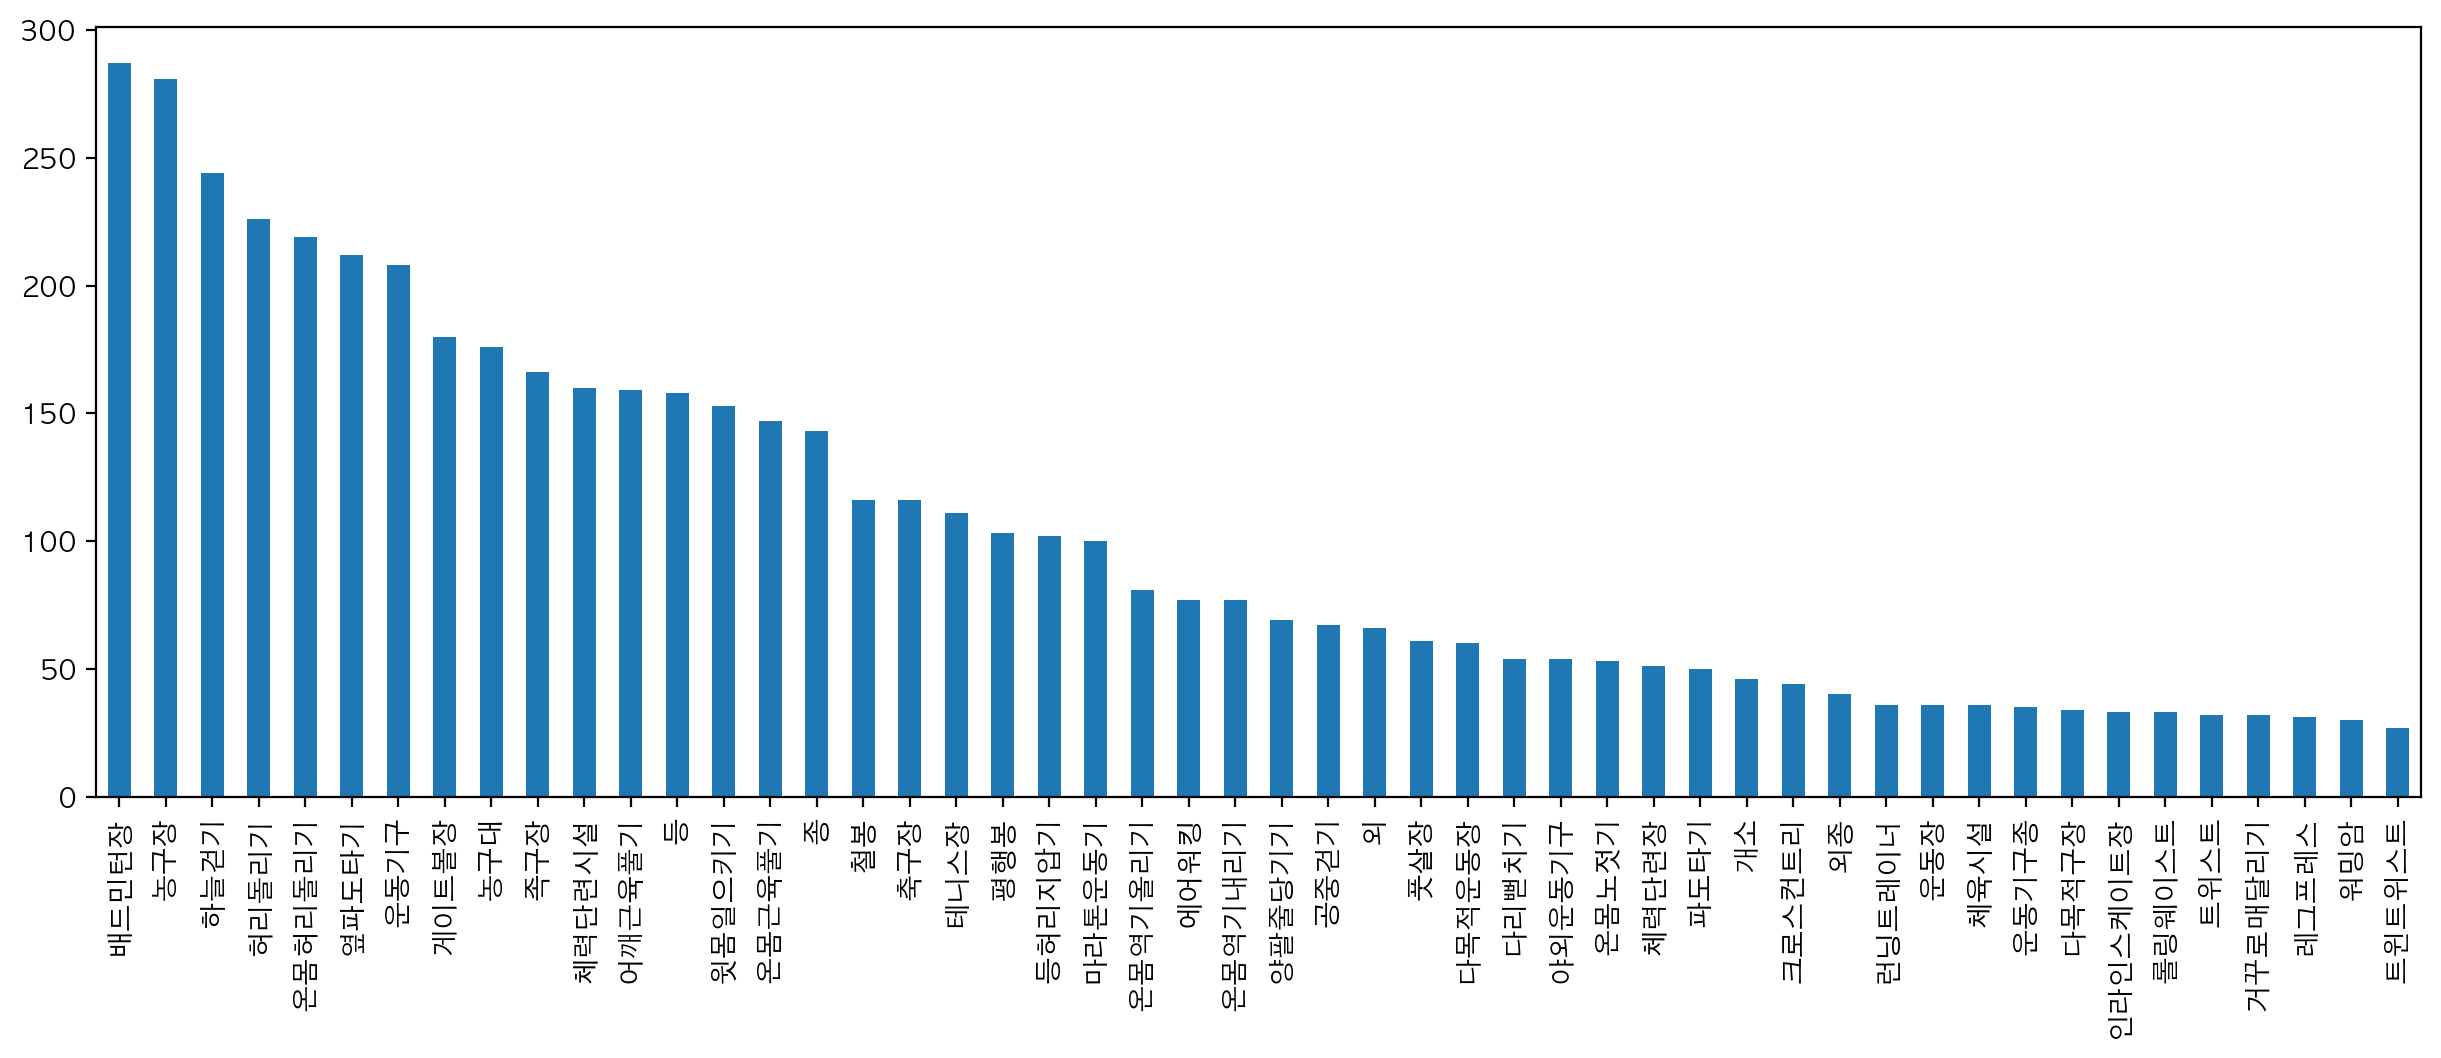

In [46]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그립니다.
plt.figure(figsize=(15,5))
gym_count.head(50).plot.bar()

### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다.
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [47]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def word_cloud(data,width=1200,height=500):
    word_draw = WordCloud(font_path=r"/Library/Fonts/AppleGothic.ttf",
                        stopwords=['운동기구','개소','외종'],
                        background_color='white',
                        width=width,
                        height=height,
                        random_state=42)
    word_draw.generate(data)

    plt.figure(figsize=(12,7))
    plt.imshow(word_draw)
    plt.axis('off')
    plt.show()

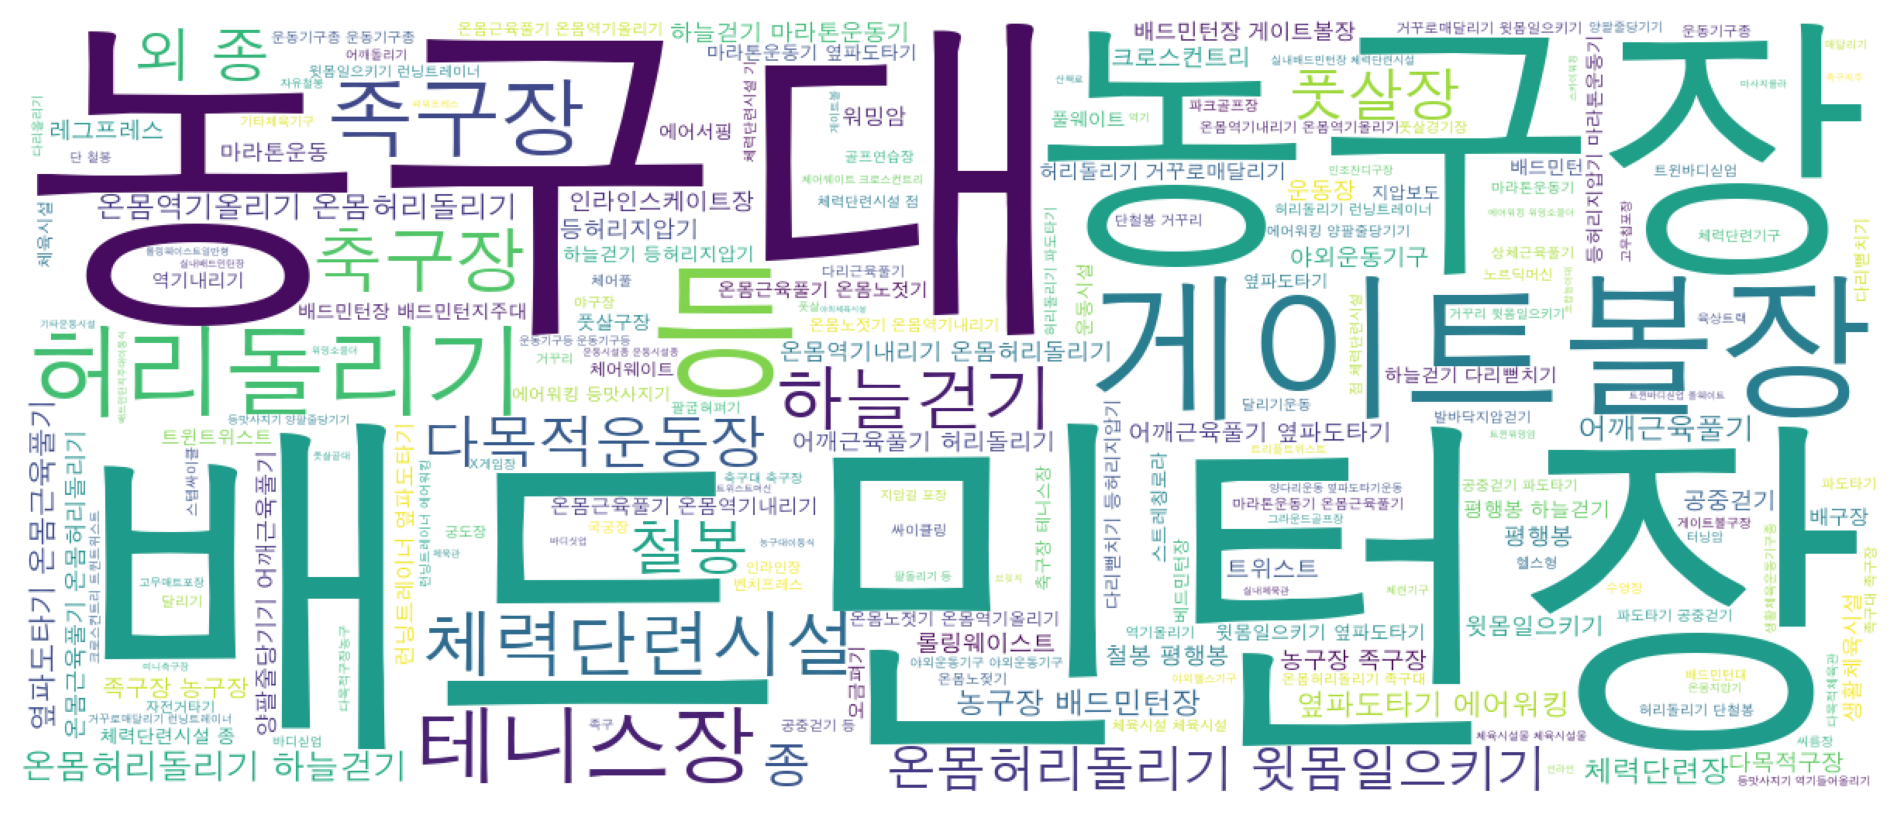

In [48]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.
word_cloud(gym)



### 편익시설

In [158]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다.
# 함수명은 get_string 으로 합니다.

def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]","",text)
    text = re.sub(" ","",text)
    text = re.sub(",{2,}","",text)
    text = re.sub("\+",",",text)
    return text

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\+'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\+'
/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_54616/1579091739.py:9: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub("[\d\.'\-(nan)\[\]\/]","",text)
/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_54616/1579091739.py:12: SyntaxWarning: invalid escape sequence '\+'
  text = re.sub("\+",",",text)


In [159]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.

get_string("[1.+ '화장실' 5, 2. 주차장, -, nan,+/]")


',화장실,주차장,'

In [149]:
# 결측치를 넣어봅니다. 오류가 나지않는지 확인해 주세요.

get_string(np.nan)


nan

In [160]:
# map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.
df['편익시설'] = df['공원보유시설(편익시설)'].map(get_string)
df['편익시설'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [161]:
# 전처리 한 "편익시설"의 빈도수를 구하고
# tail 로 끝부분에 있는 데이터를 미리보기 합니다.

df['편익시설'].value_counts().tail()

편익시설
벤치,매점,화장실,벤치                  1
화장실,주차장등                      1
파고라,평의자,종합안내판,공원이용안내판         1
바닥분수,관리사무소,화장실등               1
벤치,안내판,파고라,화장실,자전거거치대,CCTV    1
Name: count, dtype: int64

In [162]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.
# ",".join(df['편익시설']).notnull()
fac = ",".join(df.loc[df['편익시설'].notnull(),'편익시설'])
fac = get_string(fac)
fac[:1000]


'화장실,화장실,파고라식,파고라식,파고라식,파고라식,파고라식,화장실,화장실,주차장,주차장,화장실,관리사무소,매점,주차장,화장실,관리사무소,주차장,화장실,관리사무소,화장실,주차장,화장실,주차장,관리사무소,램프,램프,화장실,램프,자전거보관대,음수전,화장실,음수대,음수대,음수대,음수대,음수대,음수대,음수대,음수대,음수대,음수대,음수대,음수대,앉음벽,파고라B,피크닉테이블,등의자평의자,육각정자,등의자B,평의자B,화장실,매표소,주차장,화장실,휴게음식점,통제소,화장실,통제소,화장실,앉음벽,피크닉테이블,모듈벤치,등의자,평의자,앉음벽,파고라B,피크닉테이블,등의자,평의자,앉음벽,파고라,등의자,평의자,모듈벤치,등의자B,평의자B,모듈벤치,토끼벤치,등의자B,등의자B,평의자B,앉음벽,데크전망대A,데크전망대A,데크전망대,통석의자,통석의자,통석의자,앉음벽,파고라B,등의자,평의자,앉음벽,사각정자,등의자,평의자,앉음벽,파고라C,등의자,평의자,앉음벽,피크닉테이블B,놀이터이용안내판,종합안내판,등의자,파고라,놀이터이용안내판,평의자,등의자,조형평의자,북카페,앉음벽,파고라,나뭇잎파고라,종합안내판,자전거보관대,데크식,놀이터이용안내판,평의자,등의자,사각평상,파고라,종합안내판,놀이터이용안내판,평의자,등의자,파고라,종합안내판,파고라,화장실등,파고라,벤치등,음수대,화장실,음수대,정자,장의자,연식의자,평의자,연식의자,파고라,화장실외종,평의자,파고라,평의자,등의자,음수대,화장실,나무테이블,지압판,지압안내판,국기게양대,돌의자,화장실,화장실,화장실,파고라,평의자,등의자,음수대,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,등의자,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,파고라,평의자,음수대,자전거거치대,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,돌의자,파고라,등의자,자전거거치대,파고라,등의자,파고라,등의자,음수대,지압판,파고라,평의자,등의자,음수대,나무테이블,자전거거치대,파고라,평의자,등의자,지압판,평상,파고라,평의자,평의자,자전거거

In [153]:
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다.
# 위에서 만든 get_string 함수로 전처리를 합니다.

fac = str(df['편익시설'].tolist())
fac = get_string(fac)
fac


'화장실화장실파고라식,파고라식파고라식파고라식파고라식화장실,화장실,주차장주차장,화장실,관리사무소,매점주차장,화장실,관리사무소주차장,화장실,관리사무소,화장실,주차장,화장실,주차장,관리사무소램프램프,화장실,램프,자전거보관대음수전화장실음수대음수대,음수대,음수대,음수대,음수대음수대,음수대,음수대,음수대,음수대,음수대앉음벽,파고라B,피크닉테이블,등의자평의자,육각정자,등의자B,평의자B화장실,매표소,주차장,화장실,휴게음식점통제소,화장실,통제소,화장실,앉음벽,피크닉테이블,모듈벤치,등의자,평의자,앉음벽,파고라B,피크닉테이블,등의자,평의자,앉음벽,파고라,등의자,평의자,모듈벤치,등의자B,평의자B,모듈벤치,토끼벤치,등의자B,등의자B,평의자B,앉음벽,데크전망대A,데크전망대A,데크전망대,통석의자,통석의자,통석의자앉음벽,파고라B,등의자,평의자,앉음벽,사각정자,등의자,평의자,앉음벽,파고라C,등의자,평의자,앉음벽,피크닉테이블B,놀이터이용안내판,종합안내판,등의자,파고라,놀이터이용안내판,평의자,등의자,조형평의자,북카페,앉음벽,파고라,나뭇잎파고라,종합안내판,자전거보관대,데크식,놀이터이용안내판,평의자,등의자,사각평상,파고라,종합안내판,놀이터이용안내판,평의자,등의자,파고라,종합안내판파고라,화장실등,파고라,벤치등음수대,화장실음수대정자,장의자연식의자,평의자,연식의자,파고라화장실외종평의자파고라,평의자,등의자,음수대,화장실,나무테이블,지압판,지압안내판,국기게양대,돌의자화장실,화장실화장실,파고라,평의자,등의자,음수대,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,등의자,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,파고라,평의자,음수대,자전거거치대,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,돌의자,파고라,평의자,음수대,돌의자,파고라,등의자,자전거거치대,파고라,등의자,파고라,등의자,음수대,지압판,파고라,평의자,등의자,음수대,나무테이블,자전거거치대,파고라,평의자,등의자,지압판,평상,파고라,평의자,평의자,자전거거치대,등의자,자전거거치대,파고라,평의자,등의자,돌의자석

In [163]:
# ,가 2개 이상 들어가면 하나로 변경합니다.
# '화장실,주차장,,,' 텍스트를 정규표현식으로 바꿔봅니다.
re.sub(",{2,}",",","화장실,주차장,,,,")


'화장실,주차장,'

In [166]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()


화장실    1926
파고라    1306
벤치      611
정자      536
주차장     498
Name: count, dtype: int64

<Axes: >

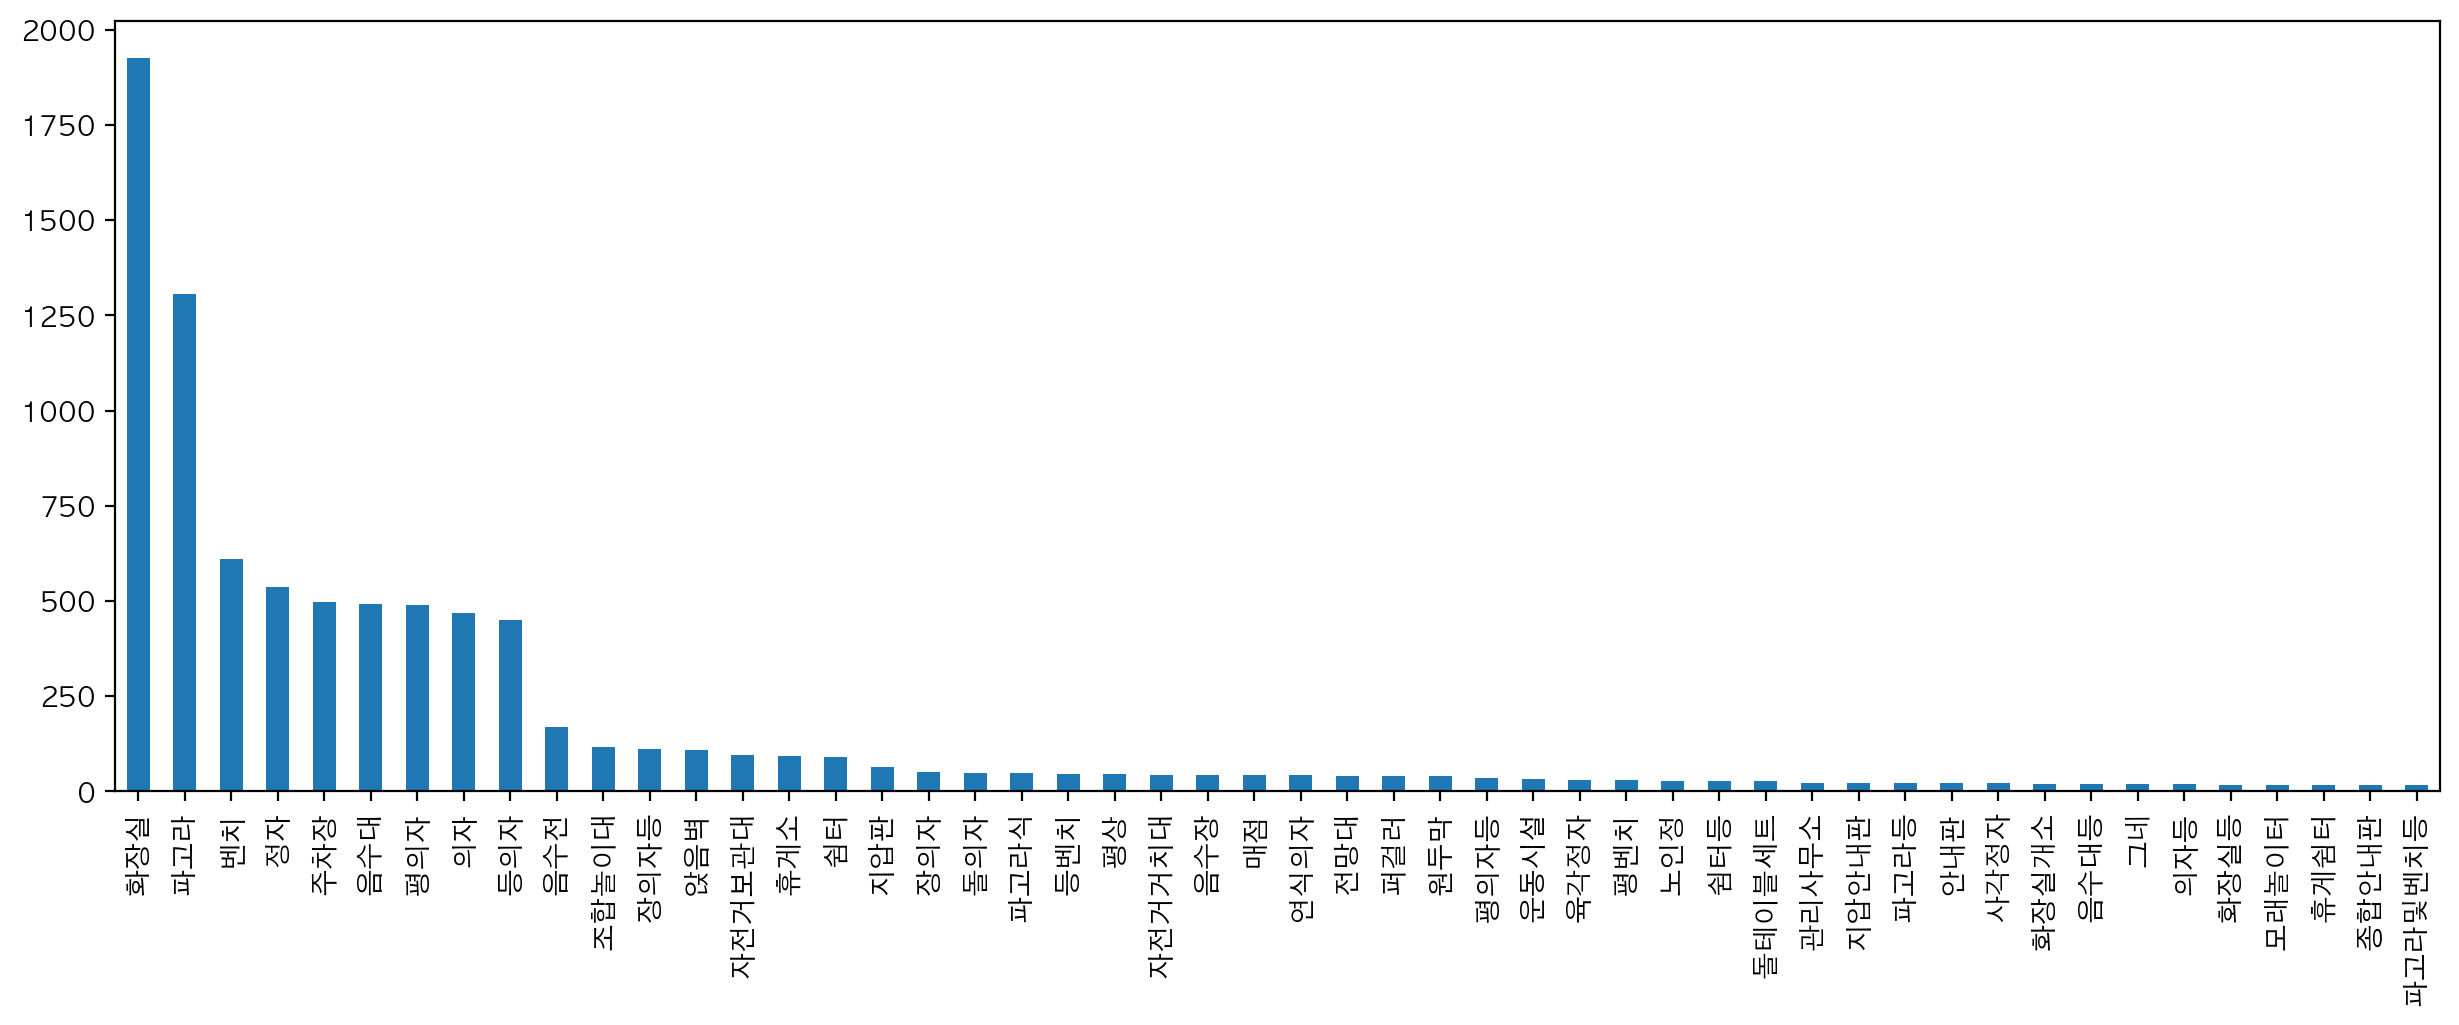

In [168]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.
plt.figure(figsize=(15,5))
fac_count.head(50).plot.bar()


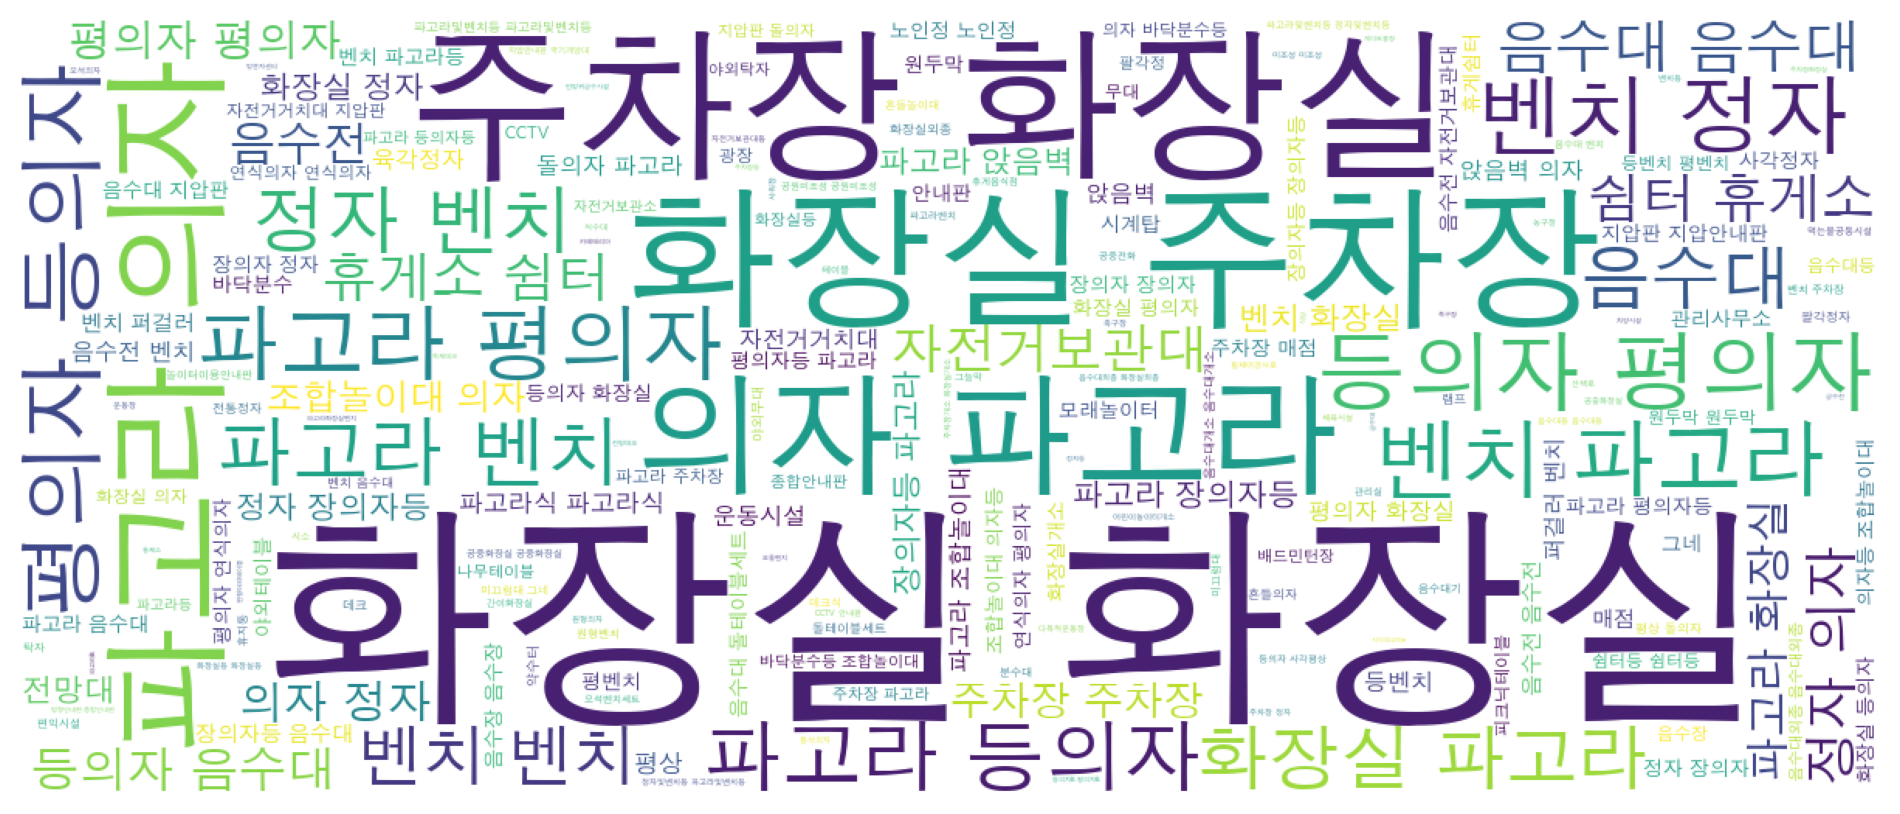

In [170]:
# 편익시설에 대한 워드클라우드를 위에서 정의한 wordcloud 함수로 그려봅니다.
word_cloud(fac)


### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [60]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.



In [61]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.



In [62]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다.



## 특정 정보 마스킹
### 전화번호 마스킹

In [63]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다.
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.



In [64]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"



In [65]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678"



In [66]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기



In [67]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어왔을 때
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되,
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.



In [68]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.



In [69]:
# 위에서 만든 함수를 map을 통해 "전화번호" 컬럼에 적용합니다.



### 이메일 주소 마스킹
* 해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹처리를 해봅니다.

In [70]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.
email = "address@mail.com"


In [71]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다.
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"



In [72]:
# 위에서 작성한 예제를 함수로 만듭니다.

mask_email(email)

NameError: name 'mask_email' is not defined

In [ ]:
# "1234address_123@gmail.com"를 마스킹 처리 합니다.


### 자동차 등록번호 마스킹
* 역시나 해당 데이터에는 자동차 등록번호가 없지만 정규표현식을 더 연습해 보기 위해 마스킹처리를 해봅니다.

In [ ]:
# 자동차 등록번호를 마스킹 합니다.
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.
car_num = "32가1234"



In [ ]:
# 자동차 등록번호를 마스킹 합니다.
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."


# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [ ]:
# data_types 변수에 데이터 타입만 따로 모으기



## 수치형 변수 요약

In [ ]:
# 수치형 변수 구하기
# var_numbers 변수에 담습니다.



In [ ]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인할 수 있습니다.
# 빈도수 분포 => 도수 분포표를 시각화 합니다.



In [ ]:
# describe 를 통해 요약합니다.



## 범주형 변수 요약

In [ ]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장합니다.



In [ ]:
# 문자열 타입의 데이터 describe 로 요약하기


## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [ ]:
# 관리기관과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.


In [ ]:
# "시도" 별 "공원구분" 의 수를 구합니다.


# 시도별 공원 분포

## 시도별 공원 비율

In [ ]:
# 시도별로 합계 데이터를 출력



In [ ]:
# 합계와 비율을 함께 구합니다.
# city 라는 변수에 담습니다.



## 공원구분별 분포

In [ ]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.



## 시도별 공원분포

In [ ]:
# 시도별로 scatterplot 의 색상을 다르게 표현하고 공원면적에 따라 원의 크기를 다르게 그립니다.



https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [ ]:
# countplot 으로 시도별 빈도수를 그립니다.



## 특정 공원구분 가져오기

In [ ]:
# "공원구분"별로 빈도수를 구합니다.



In [ ]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.
park_type = r'.*((역사|체육|수변|문화)공원).*'



In [ ]:
# 위에서 정의한 var_numbers 라는 변수를 가져와 출력해 봅니다.



In [ ]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다.



In [ ]:
# 기존 리스트의 원소를 제거하기 - '지정고시일', '고시연도', '고시월'
# 제거 한 후 다시 제거하려고 하면 다음과 같은 오류가 발생할 수 있습니다.
# ValueError: list.remove(x): x not in list



In [ ]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.


## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [ ]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.



## 내가 사는 지역의 공원을 지도에 표시해 보기

In [ ]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.



In [ ]:
# "시도", "구군", "공원명" 컬럼만 미리보기 합니다.



### 특정 공원 정보 찾아보기
* 판교의 화랑공원을 찾아봅니다.

In [ ]:
# str.contains 로 "공원명"에 "화랑"이 들어가는 데이터를 찾습니다.



In [ ]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)'



###  지도에 표현하기
* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/main/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/

In [ ]:
# folium 으로 지도에 표현해 봅니다.
# 지도에서 한글이 깨지면 html 문서로 저장해서 보세요

